# Credit Card Default Prediction

## Abstract

Financial threats are displaying a trend about the credit risk of commercial banks as the
incredible improvement in the financial industry has arisen. In this way, one of the
biggest threats faces by commercial banks is the risk prediction of credit clients. The
goal is to predict the probability of credit default based on credit card owner's
characteristics and payment history.

## Dataset details

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

## Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, KFold, StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

## Load the dataset

In [ ]:
df_creddef = pd.read_csv('UCI_Credit_Card.csv')

## Preliminary Analysis

### Dataset shape and datatypes

In [ ]:
df_creddef.shape

(30000, 25)

In [ ]:
df_creddef.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

This dataset contains 30000 rows with 25 columns

In [ ]:
df_creddef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Most of the columns are either in int64 or float64 datatypes.

In [ ]:
pd.set_option('display.max_columns',None)
df_creddef.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Null values check

In [ ]:
df_creddef.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

We could see that there are no null values in any of the columns

### Dataset describe

In [ ]:
df_creddef.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


There are 30000 distinct credit card clients.

The average value for the amount of credit card limit is 167484. The standard deviation is unusually large, max value being 1000000.

Education Level is mostly graduate school and university.

Most of the clients are either married or single .

Average age is 35.45 years, with a standard deviation of 9.14

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

## Exploratory Data Analysis

### Class imbalance Check

In [ ]:
df_creddef['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [ ]:
df_creddef['default.payment.next.month'].value_counts()/len(df_creddef['default.payment.next.month'])*100

0    77.88
1    22.12
Name: default.payment.next.month, dtype: float64

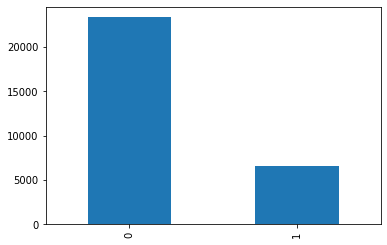

In [ ]:
df_creddef['default.payment.next.month'].value_counts().plot.bar()

The percentage of non defaulters are 77.88% and defaulters are 22.12%. Clearly it is showing that the class is imbalanced

### Distribution of pay0 to pay6 columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb791481e50>,
      dtype=object)

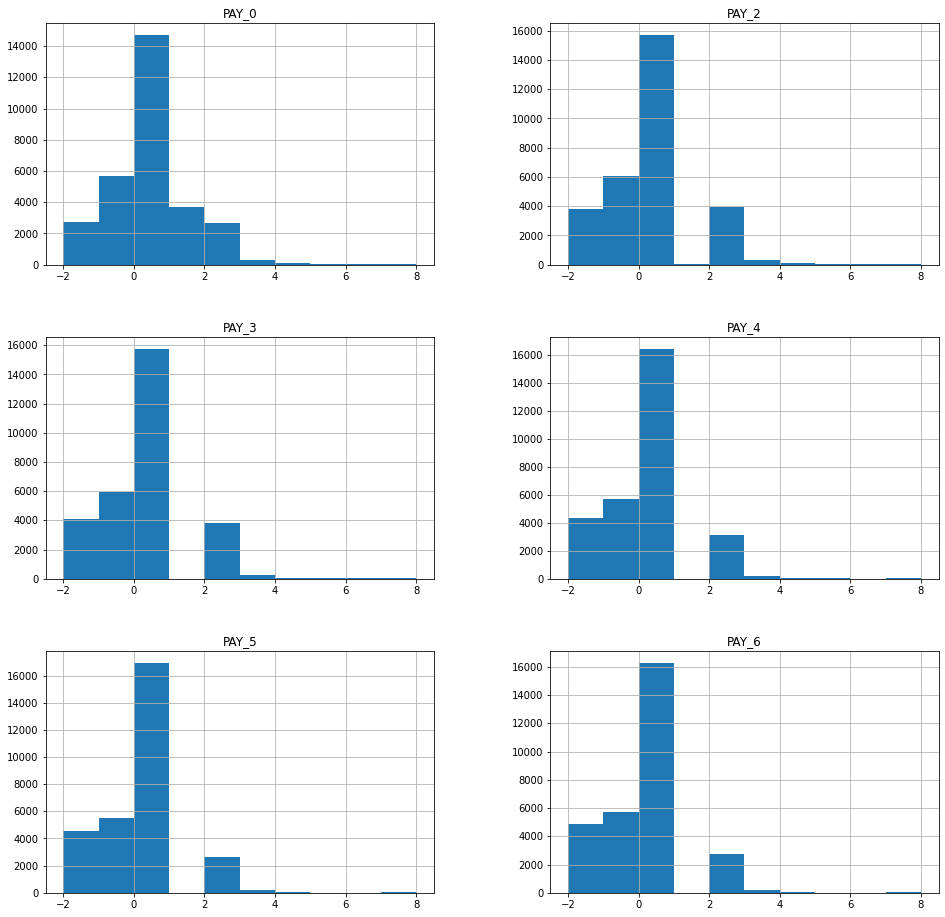

In [ ]:
pay_columns = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df_creddef.hist(column=pay_columns,figsize=(16,16))

The distribution of pay_0 to pay_6 are almost similar

### Distribution of bill_amt columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb793171e10>,
      dtype=object)

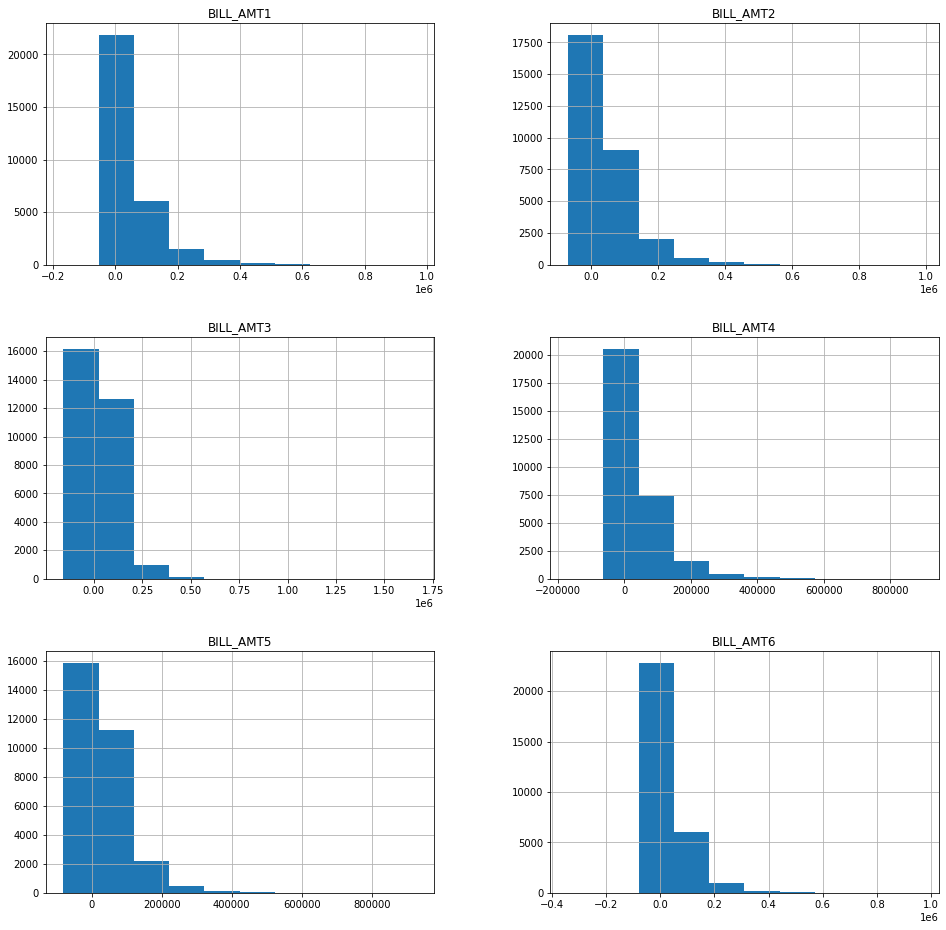

In [ ]:
bill_amt_columns = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
df_creddef.hist(column=bill_amt_columns,figsize=(16,16))

Mostly of log normal distributions

### Distribution of pay_amt columns

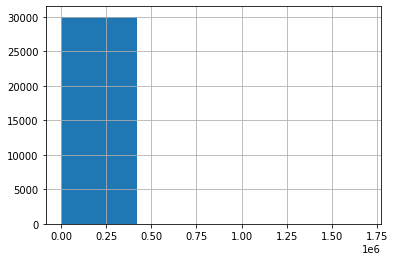

In [ ]:
df_creddef['PAY_AMT2'].hist(bins=4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb78eb40210>,
      dtype=object)

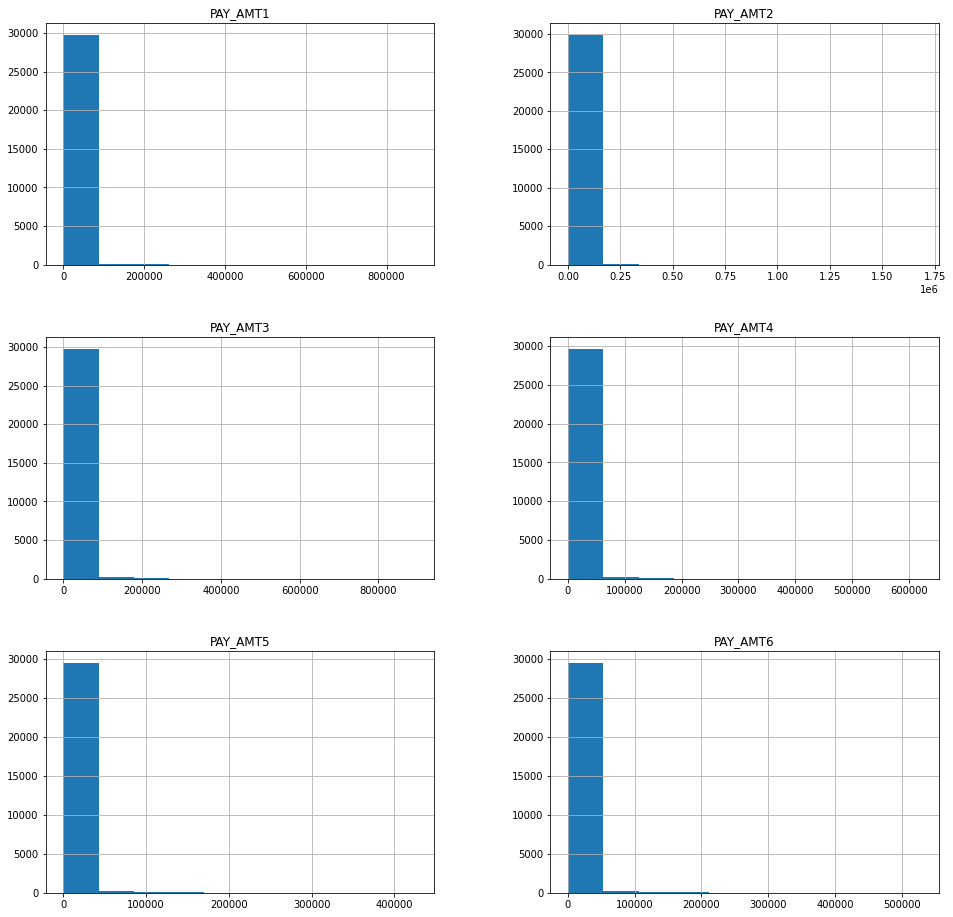

In [ ]:
pay_amt_columns = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df_creddef.hist(column=pay_amt_columns,figsize=(16,16))

Apart from Pay_amt2 rest of all the distributions are almost same

### Gender based distribution of data

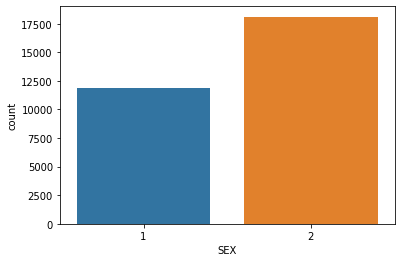

In [ ]:
sns.countplot(x='SEX',data=df_creddef)

Female are slightly more than the male

### Education based distribution of data

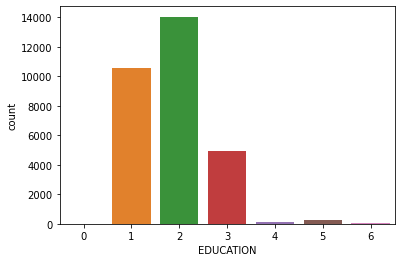

In [ ]:
sns.countplot(x='EDUCATION',data=df_creddef)

More number of credit holders are university students followed by Graduates and then High school students

### Distribution of Marital Status

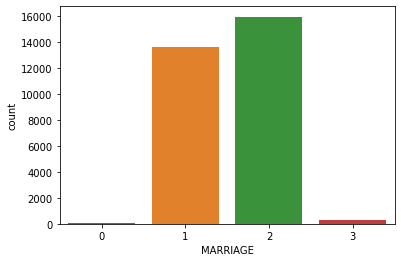

In [ ]:
sns.countplot(x='MARRIAGE',data=df_creddef)

### Gender wise defaulters

In [ ]:
dfgb = df_creddef.groupby('SEX')['default.payment.next.month'].value_counts()

In [ ]:
dfgb

SEX  default.payment.next.month
1    0                              9015
     1                              2873
2    0                             14349
     1                              3763
Name: default.payment.next.month, dtype: int64

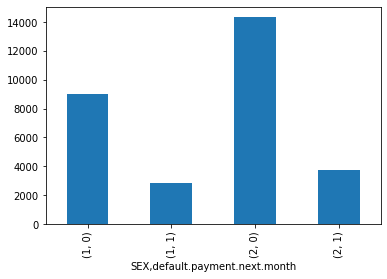

In [ ]:
dfgb.plot.bar()

In [ ]:
for i in df_creddef['SEX'].unique():
    if i == 1:
        print('Male')
    else:
        print('Female')
    ratio = df_creddef['default.payment.next.month'].value_counts()/len(df_creddef[df_creddef['SEX']==i]['SEX'])
    print(ratio)

Female
0    1.289973
1    0.366387
Name: default.payment.next.month, dtype: float64
Male
0    1.965343
1    0.558210
Name: default.payment.next.month, dtype: float64


we could see female defaulters are slightly higher than male defaulters but when compared to the proportion of the defaulters and non defaulters with total number, Male are more defaulters with that of Female

### Which Gender is having more Limit Balance

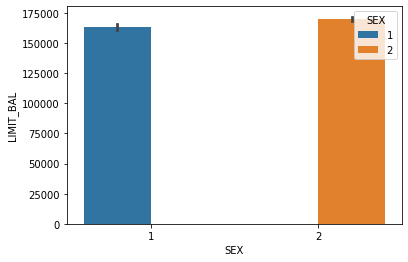

In [ ]:
sns.barplot(x='SEX',y='LIMIT_BAL',data=df_creddef,hue='SEX')

Both Male and Female Credit holders are having almost equal limit balance

### Limit Balance based on the Marital status

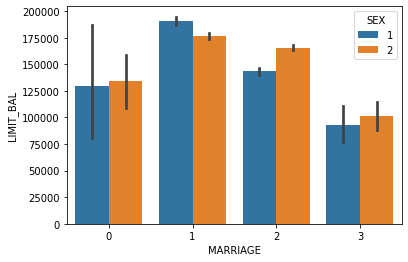

In [ ]:
sns.barplot(x='MARRIAGE',y='LIMIT_BAL',data=df_creddef,hue='SEX')

As per the documentation, we have only 3 marital status 1 = Married, 2 = Single, 3 = others but we could see value 0. We have to investigate this 

### Defaulters based on Education

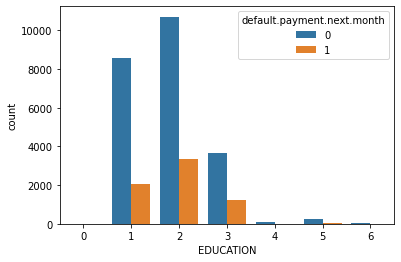

In [ ]:
sns.countplot(x='EDUCATION',data=df_creddef,hue='default.payment.next.month')

In [ ]:
for i in df_creddef['EDUCATION'].unique():
    print(i)
    ratio = df_creddef['default.payment.next.month'].value_counts()/len(df_creddef[df_creddef['EDUCATION']==i]['EDUCATION'])
    print(ratio)

2
0    1.665289
1    0.472986
Name: default.payment.next.month, dtype: float64
1
0    2.207274
1    0.626925
Name: default.payment.next.month, dtype: float64
3
0    4.751678
1    1.349603
Name: default.payment.next.month, dtype: float64
5
0    83.442857
1    23.700000
Name: default.payment.next.month, dtype: float64
4
0    189.95122
1     53.95122
Name: default.payment.next.month, dtype: float64
6
0    458.117647
1    130.117647
Name: default.payment.next.month, dtype: float64
0
0    1668.857143
1     474.000000
Name: default.payment.next.month, dtype: float64


From the above plot it is clear that those people who are university students have less default payment wrt graduates and high school people

### Age wise defaulters

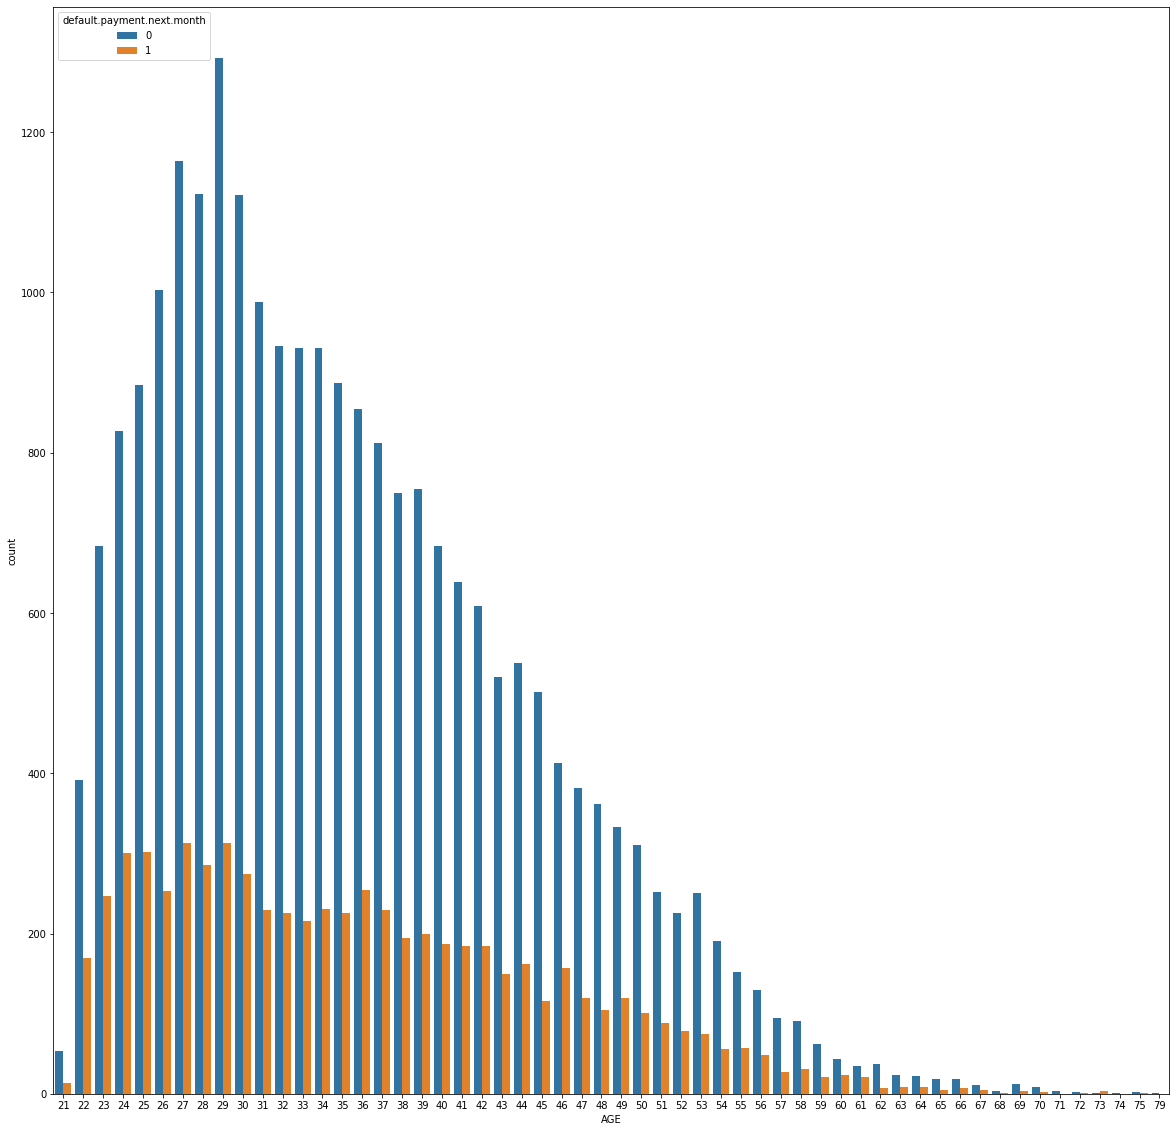

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(x='AGE',data=df_creddef,hue='default.payment.next.month')


### Month payment status with default and non default

In [ ]:
d1  = df_creddef[pay_columns[0]].value_counts()
x1 = df_creddef[pay_columns[0]][(df_creddef['default.payment.next.month']==1)].value_counts()

print(d1)
print(x1)

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64
 0    1888
 2    1844
 1    1252
-1     954
-2     365
 3     244
 4      52
 5      13
 8      11
 7       7
 6       6
Name: PAY_0, dtype: int64


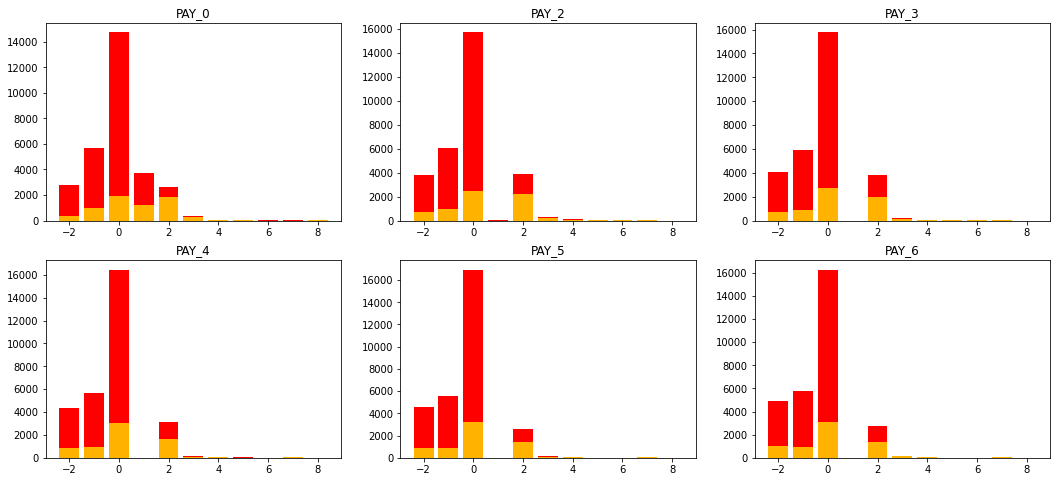

In [ ]:
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_columns)):
    row,col = int(i/3), i%3

    d  = df_creddef[pay_columns[i]].value_counts()
    x = df_creddef[pay_columns[i]][(df_creddef['default.payment.next.month']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_columns[i])
   


    
plt.show()

The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.

### Bill amount with default and non default

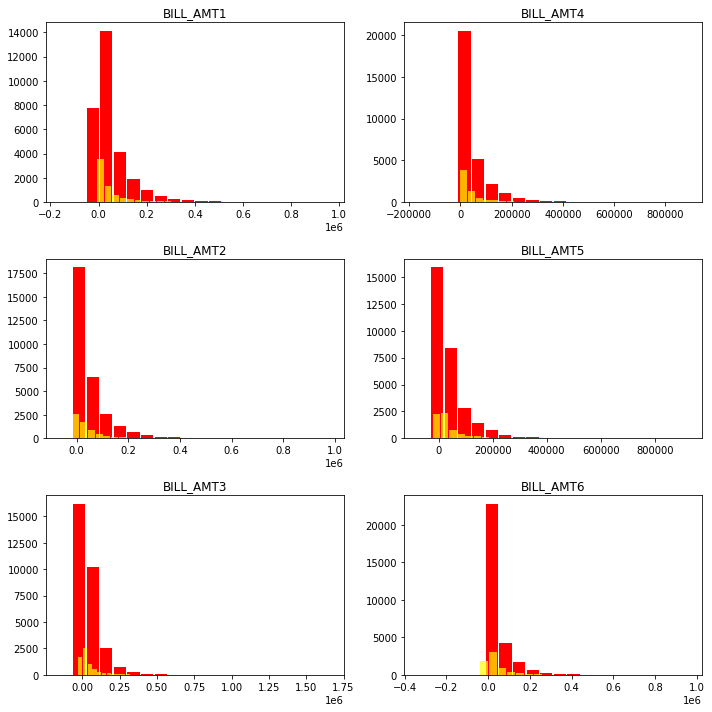

In [ ]:
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(bill_amt_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df_creddef[bill_amt_columns[i]], 20,rwidth=0.9, color ='red')
    ax[row,col].hist(df_creddef[bill_amt_columns[i]][(df_creddef['default.payment.next.month']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_amt_columns[i])
plt.tight_layout()
plt.show()

The above histogram shows the distribution of Bill amount generated for each month explicitly for defaulters and non-defaulters

### BILL_AMT and LIMIT_BAL comparison

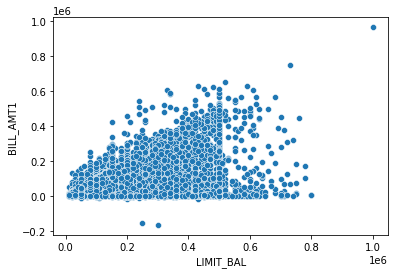

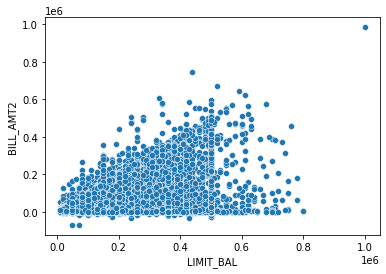

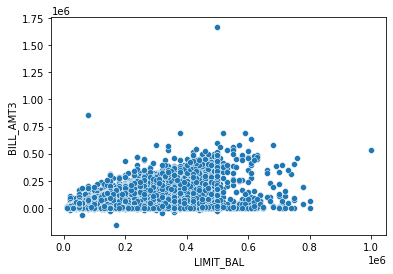

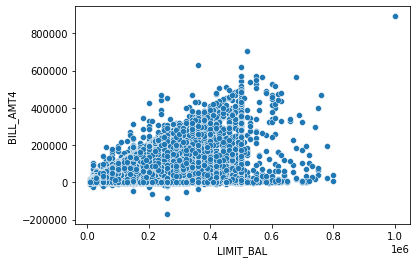

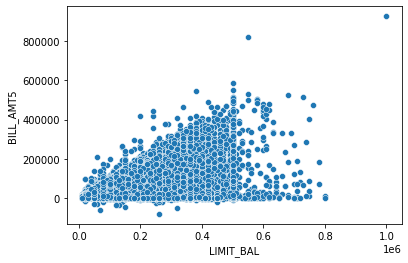

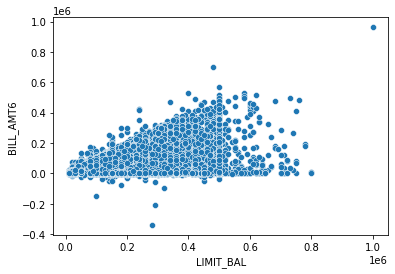

In [ ]:
for i in bill_amt_columns:
    sns.scatterplot(x='LIMIT_BAL',y=i,data=df_creddef)
    plt.show()

### Outlier Detection

In [ ]:
outlier_chk_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

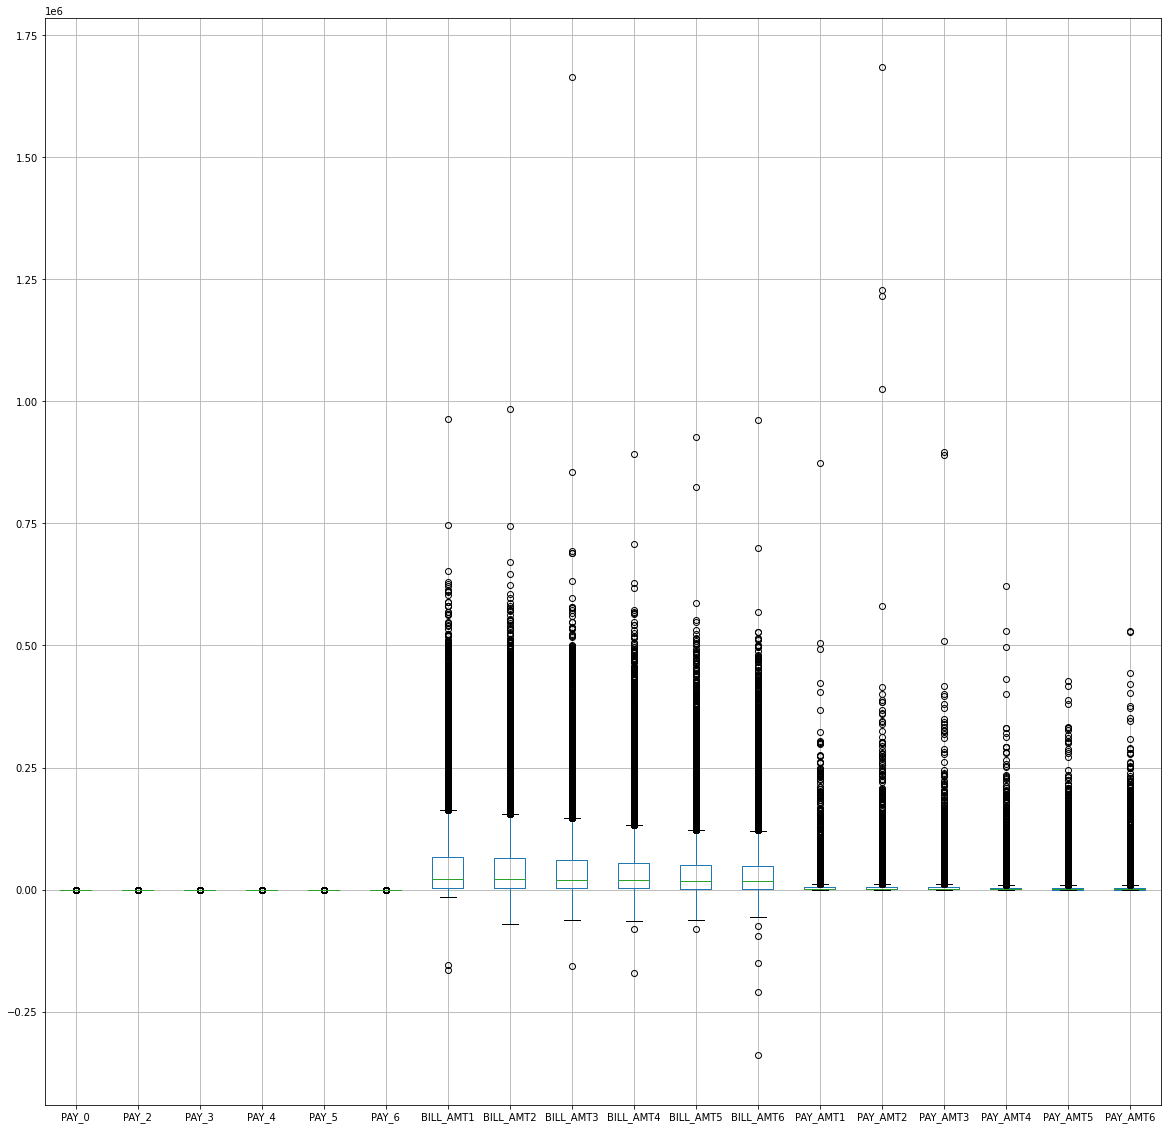

In [ ]:
df_creddef.boxplot(outlier_chk_columns,figsize=(20,20))

### Pairplot

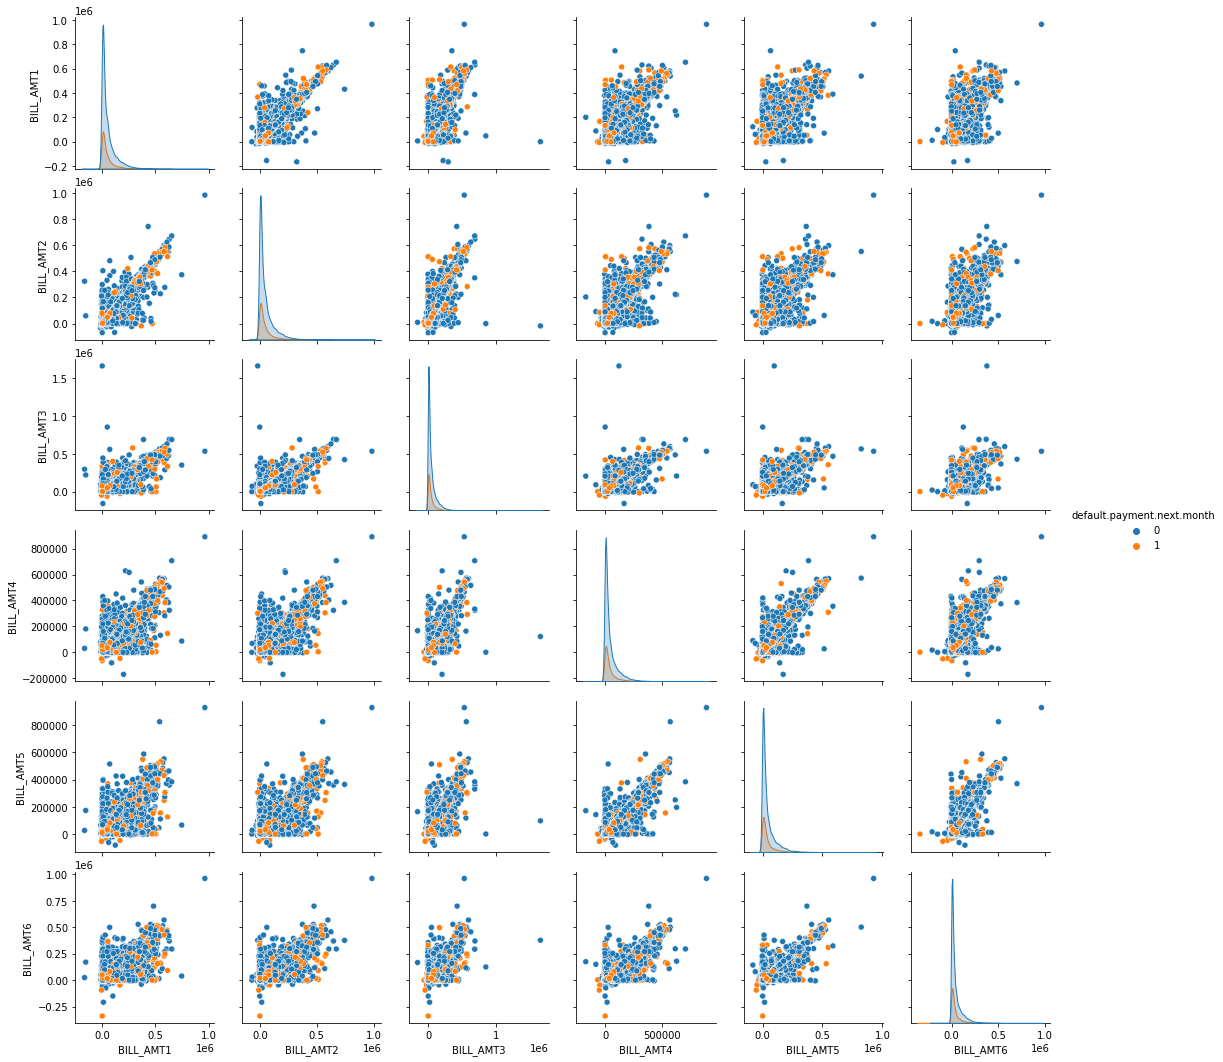

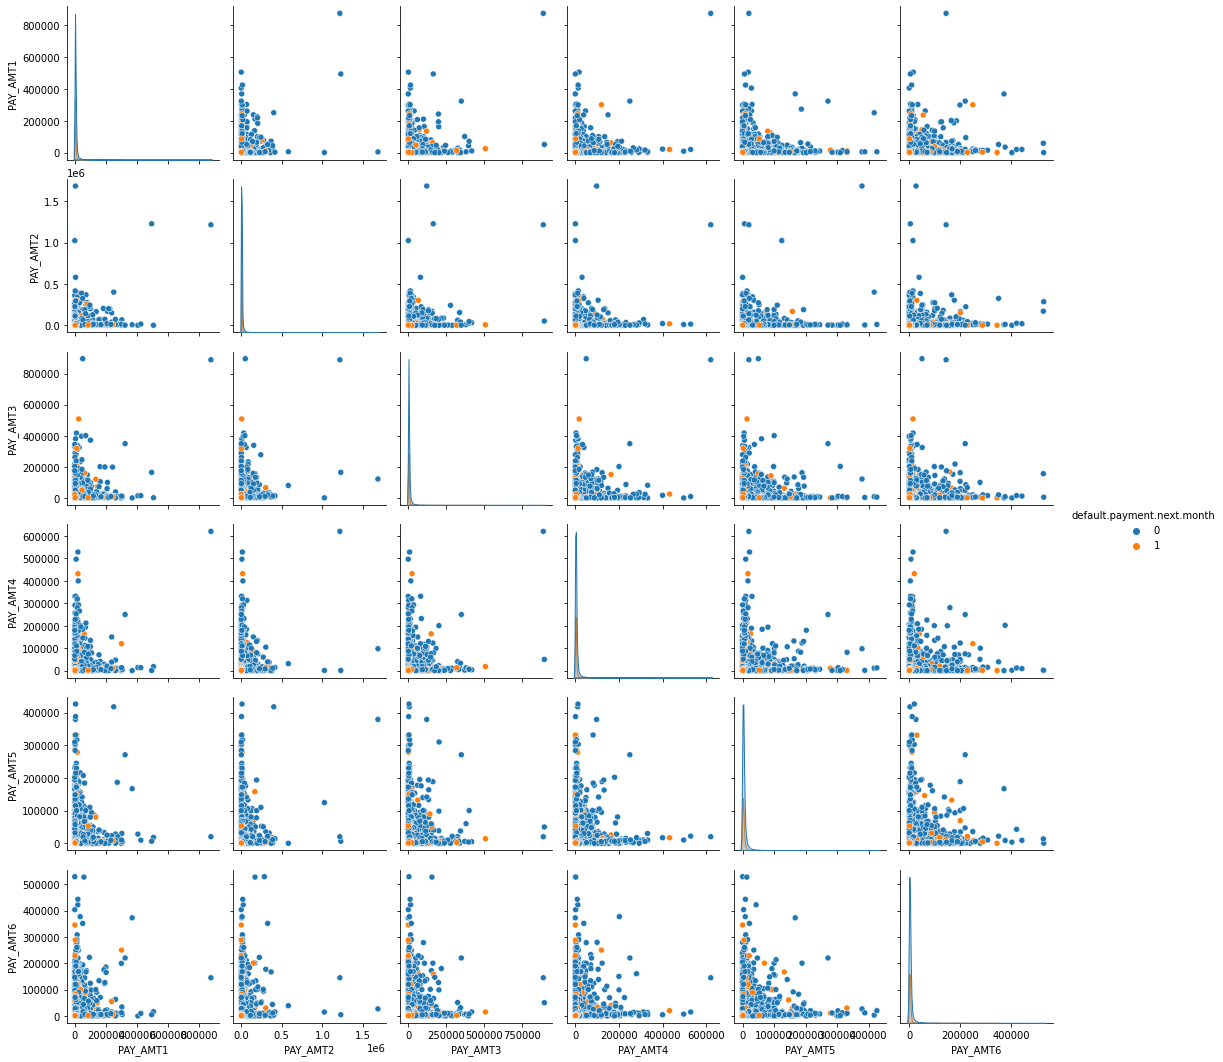

In [ ]:
sns.pairplot(df_creddef, vars=df_creddef.columns[12:18], kind='scatter',hue= 'default.payment.next.month')
sns.pairplot(df_creddef, vars=df_creddef.columns[18:24],hue = 'default.payment.next.month')

### Correlation heat map

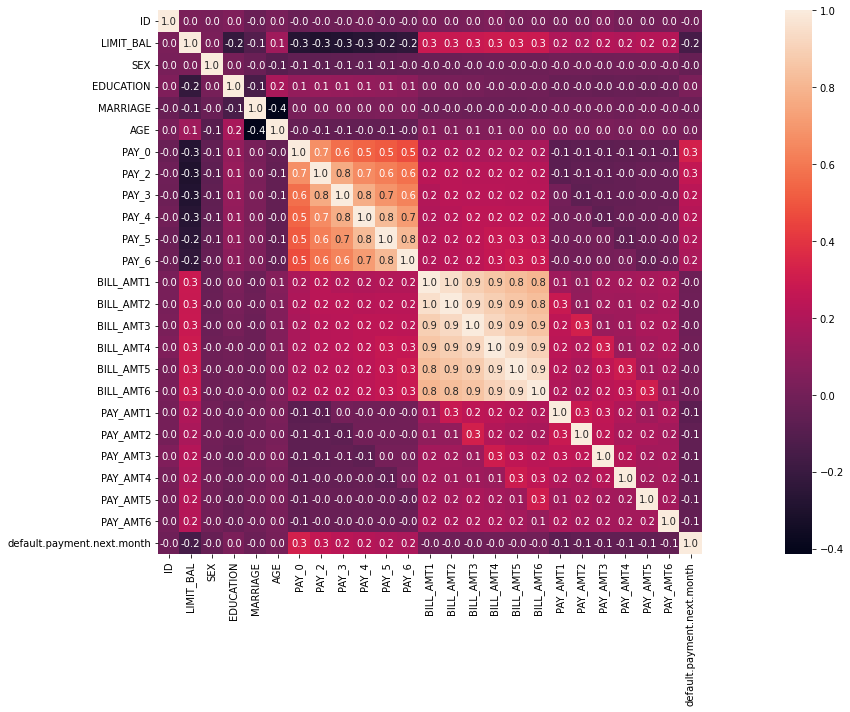

In [ ]:
correlation = df_creddef.corr()
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )

So it looks like the PAY_0, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and PAY_AMT_X variables.

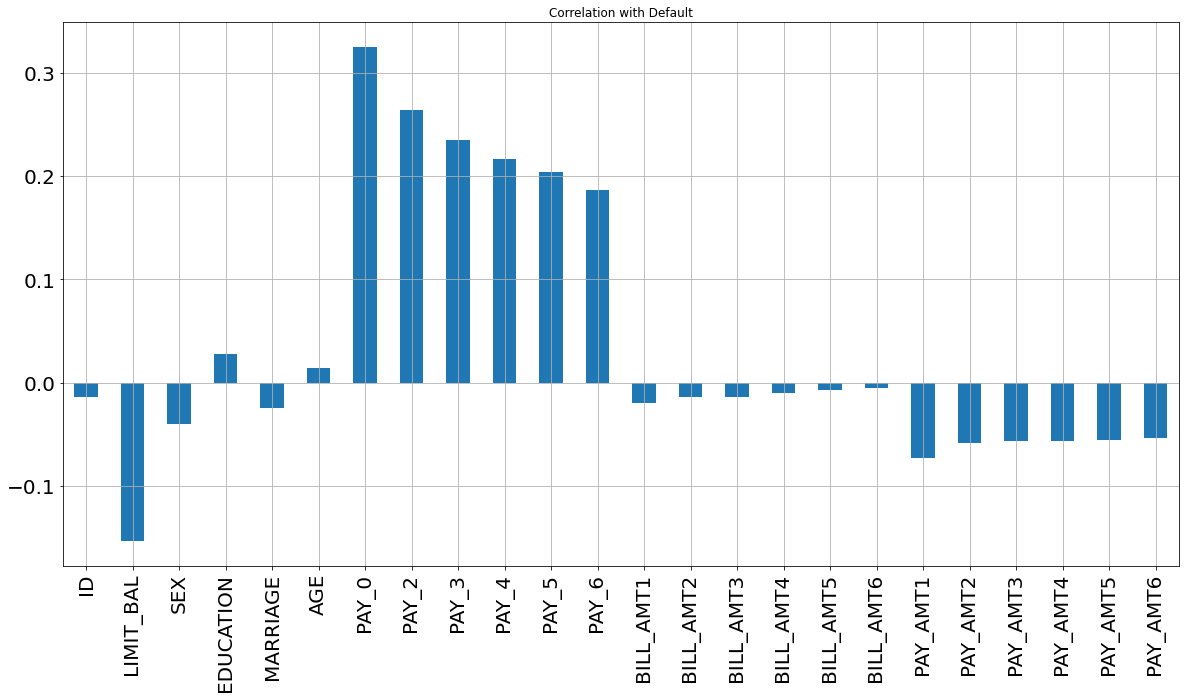

In [ ]:
X = df_creddef.drop(['default.payment.next.month'],axis=1)
X.corrwith(df_creddef['default.payment.next.month']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

It seems from the above graph is that most negatively correlated feature is LIMIT_BAL but we cannot blindly remove this feature because according to me it is very important feature for prediction. ID is unimportant and it has no role in prediction so we will remove it later.

### Facet Age vs Sex

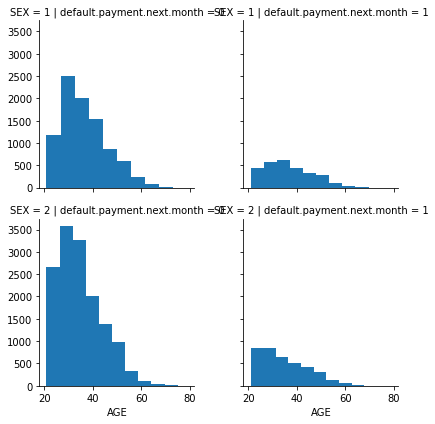

In [ ]:
g = sns.FacetGrid(df_creddef, col = 'default.payment.next.month', row = 'SEX')
g.map(plt.hist, 'AGE')

## Data Transformation

EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.

MARRIAGE has a label 0 that is undocumented

Data Transformation

The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).

The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)

### Convert Education values of 5,6,0 to 4 (others category)

In [ ]:
data = df_creddef.copy()
fil = (data.EDUCATION == 5) | (data.EDUCATION == 6) | (data.EDUCATION == 0)
data.loc[fil, 'EDUCATION'] = 4
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [ ]:
df_creddef.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
data['EDUCATION'].value_counts(dropna = False)

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

### Convert Marriage 0 to 3

In [ ]:
data.loc[data.MARRIAGE == 0, 'MARRIAGE'] = 3
data.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [ ]:
df_creddef.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


### Convert negative value in pay columns to 0

In [ ]:
data1 = data.copy()

In [ ]:
data1[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']] = data1[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].replace(-1, 0)
data1[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']] = data1[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].replace(-2, 0)

In [ ]:
data1.PAY_0.unique()

array([2, 0, 1, 3, 4, 8, 7, 5, 6])

In [ ]:
for i in ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']:
    print(data1[i].value_counts())

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_0, dtype: int64
0    25562
2     3927
3      326
4       99
1       28
5       25
7       20
6       12
8        1
Name: PAY_2, dtype: int64
0    25787
2     3819
3      240
4       76
7       27
6       23
5       21
1        4
8        3
Name: PAY_3, dtype: int64
0    26490
2     3159
3      180
4       69
7       58
5       35
6        5
1        2
8        2
Name: PAY_4, dtype: int64
0    27032
2     2626
3      178
4       84
7       58
5       17
6        4
8        1
Name: PAY_5, dtype: int64
0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: PAY_6, dtype: int64


In [ ]:
data1[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567
std,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000


In [ ]:
data1[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [ ]:
data1.shape

(30000, 25)

In [ ]:
data1.columns = data1.columns.map(str.lower)

In [ ]:
data1.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default.payment.next.month'],
      dtype='object')

### Remove certain columns and rename certain columns

In [ ]:
data1 = data1.drop('id',axis=1)

In [ ]:
data1.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# Rename pay_0 to pay_1 and default.payment.next.month to def_pay
data1 = data1.rename(columns={'pay_0':'pay_1', 'default.payment.next.month' : 'def_pay'})
data1.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
0,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
data1.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'def_pay'],
      dtype='object')

### Feature Scaling of Numerical Attributes

In [ ]:
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
#data1[col_to_norm] = data1[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))
Scale_standard = StandardScaler()
data1[col_to_norm] = Scale_standard.fit_transform(data1[col_to_norm])

In [ ]:
data1

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
0,-1.136720,2,2,1,-1.246020,2,2,0,0,0,0,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,-0.365981,2,2,2,-1.029047,0,2,0,0,0,2,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,-0.597202,2,2,2,-0.161156,0,0,0,0,0,0,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,-0.905498,2,2,1,0.164303,0,0,0,0,0,0,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,-0.905498,1,2,1,2.334029,0,0,0,0,0,0,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,1,3,1,0.381275,0,0,0,0,0,0,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0
29996,-0.134759,1,3,2,0.815221,0,0,0,0,0,0,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,0
29997,-1.059646,1,2,2,0.164303,4,3,2,0,0,0,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1
29998,-0.674276,1,3,1,0.598248,1,0,0,0,0,0,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1


## Train test split

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(data1, data1["def_pay"]):
    strat_train_set = data1.loc[train_index]
    strat_test_set = data1.loc[test_index]

In [ ]:
strat_train_set.shape

(24000, 24)

In [ ]:
strat_test_set.shape

(6000, 24)

In [ ]:
x_train = strat_train_set.iloc[:,:-1]
y_train = strat_train_set.iloc[:,-1]
x_test = strat_test_set.iloc[:,:-1]
y_test = strat_test_set.iloc[:,-1]

In [ ]:
x_train

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
22788,-0.057685,2,2,2,-0.269643,2,2,3,2,0,0,1.501300,1.734557,1.752429,1.881606,2.012786,2.084412,0.563691,-0.256990,-0.296801,0.081318,0.490940,0.049755
29006,-0.134759,2,1,2,-0.161156,1,0,0,0,0,0,-0.695642,-0.690239,-0.677929,-0.672497,-0.663059,-0.652724,-0.338742,-0.256990,-0.296801,-0.308063,-0.314136,-0.293382
16950,-1.213794,1,2,1,1.574625,1,2,0,0,0,0,-0.557514,-0.576473,-0.556138,-0.547100,-0.527737,-0.511674,-0.341821,-0.201392,-0.232394,-0.289296,-0.294173,-0.237130
22280,0.404759,2,1,2,-0.703588,0,0,0,0,0,0,2.113892,2.274161,2.424371,2.724160,1.502539,1.603178,0.207476,0.133627,0.151154,-0.001665,0.006585,0.044129
11346,1.098425,2,1,2,-0.378129,1,0,0,0,0,0,-0.695642,-0.690983,-0.673228,-0.667430,-0.666924,-0.656670,-0.341942,-0.242841,-0.296801,-0.308063,-0.314136,-0.225880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23479,-0.520128,2,2,2,-0.486615,0,0,0,0,0,0,0.544861,0.605991,0.683620,0.842866,0.942372,0.980121,-0.142159,-0.065110,0.014785,-0.091031,-0.082366,-0.074337
13921,-0.365981,2,2,2,-1.246020,0,0,0,0,0,2,0.829945,0.901638,0.987795,1.098758,1.345737,1.395229,-0.088364,-0.079042,-0.063935,0.330267,-0.015669,-0.293382
3794,-0.365981,2,1,2,-1.246020,0,0,0,0,0,0,0.333711,0.376900,0.290906,0.103542,-0.117169,-0.319811,-0.118552,-0.169188,-0.182299,-0.180397,-0.235592,-0.237130
27565,1.483795,1,1,1,2.334029,1,0,0,0,0,0,-0.695642,-0.690983,-0.665527,-0.668673,-0.663815,-0.653497,-0.341942,-0.219664,-0.282829,-0.308063,-0.314136,-0.293382


In [ ]:
x_test

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
6907,-0.905498,1,2,2,1.140680,0,0,0,0,0,0,-0.674728,-0.324831,-0.677929,-0.631305,-0.608450,-0.606312,1.231444,-0.256990,-0.099603,-0.159970,-0.198676,-0.133570
24575,-0.134759,1,1,1,-0.486615,0,0,0,0,0,0,-0.491933,-0.690983,-0.677929,-0.672497,-0.663059,-0.456362,-0.341942,-0.256990,-0.296801,-0.308063,0.451276,1.394176
26766,-0.905498,1,2,2,-1.137534,0,0,0,0,0,0,-0.042892,-0.011579,0.028780,0.103931,0.167241,0.198650,-0.233266,-0.176956,-0.171849,-0.180397,-0.196320,-0.178741
2156,0.944277,2,1,2,-1.137534,0,0,0,0,0,0,3.457608,3.576123,3.595922,3.194969,3.317178,3.224907,0.563691,0.198730,0.271165,0.649431,0.199280,1.019144
3179,2.562830,2,2,1,-0.920561,0,0,0,0,0,0,-0.541448,-0.550719,-0.482250,-0.517053,-0.498574,-0.484807,0.260787,0.332712,0.271165,0.330267,0.340398,1.130017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8836,-0.134759,2,4,2,-0.920561,0,0,0,0,0,0,-0.530258,-0.377042,0.264129,-0.356433,-0.524349,-0.479232,1.013610,2.593471,0.860033,-0.306467,0.364157,-0.018816
1259,-0.905498,1,1,2,-1.246020,2,2,0,0,0,0,-0.017347,-0.005214,-0.022267,-0.358065,-0.352184,-0.332573,-0.341942,-0.166757,-0.257441,-0.239123,-0.268319,-0.236905
27309,0.404759,1,1,2,-0.161156,0,0,0,0,0,0,-0.497529,-0.597001,-0.610674,-0.524359,1.281242,1.231409,-0.038796,-0.054129,0.244471,7.351887,-0.314136,-0.293382
29583,-0.365981,1,1,2,-1.029047,0,0,0,0,0,0,-0.663293,-0.678563,-0.677929,-0.672497,-0.491238,-0.652724,-0.288570,-0.256990,-0.296801,0.358736,-0.314136,-0.293382


## Applying Machine Learning Algorithm for Classification Problem

In [ ]:
models = [
    LogisticRegression(random_state=1),
    SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1),
    KNeighborsClassifier(n_neighbors=5,n_jobs=-1),
    SVC(kernel = 'rbf', random_state = 0),
    GaussianNB(),
    DecisionTreeClassifier(criterion = 'gini',random_state = 0),
    RandomForestClassifier(n_estimators = 100,criterion = 'gini',random_state = 0),
]

print("-------------------Trining multiple models------------------------")
model_name_lst = []
training_score_lst = []
acc_score_lst = []
prec_score_lst = []
recall_score_lst = []
f1_score_lst = []
roc_auc_score_lst = []

for model in models:
    print("===============================================================")
    model_name = model.__class__.__name__
    print("====================Begining of model=={}============".format(model_name))
    model_name_lst.append(model_name)
    model.fit(x_train, y_train)
    training_score_lst.append(model.score(x_train,y_train))
    y_pred = model.predict(x_test)
    roc=roc_auc_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    acc_score_lst.append(acc)
    prec_score_lst.append(prec)
    recall_score_lst.append(rec)
    f1_score_lst.append(f1)
    roc_auc_score_lst.append(roc)
    print("====================end of model==============")



-------------------Trining multiple models------------------------
====================Begining of model==LogisticRegression============
====================end of model==============
====================Begining of model==SGDClassifier============
====================end of model==============
====================Begining of model==KNeighborsClassifier============
====================end of model==============
====================Begining of model==SVC============
====================end of model==============
====================Begining of model==GaussianNB============
====================end of model==============
====================Begining of model==DecisionTreeClassifier============
====================end of model==============
====================Begining of model==RandomForestClassifier============
====================end of model==============


In [ ]:
results = pd.DataFrame({'Model':model_name_lst,
                       'Training Score':training_score_lst,
                    'Accuracy':acc_score_lst,
                    'Precision': prec_score_lst,
                    'Recall':recall_score_lst,
                    'F1 Score':f1_score_lst,
                    'Roc score':roc_auc_score_lst}
               )

In [ ]:
results

,Model,Training Score,Accuracy,Precision,Recall,F1 Score,Roc score
0,LogisticRegression,0.819208,0.815000,0.665145,0.329314,0.440524,0.641118
1,SGDClassifier,0.818625,0.818500,0.639344,0.411454,0.500688,0.672772
2,KNeighborsClassifier,0.844208,0.788333,0.533101,0.345893,0.419561,0.629933
3,SVC,0.824958,0.815500,0.658046,0.345139,0.452793,0.647104
4,GaussianNB,0.771708,0.764833,0.471850,0.530520,0.499468,0.680946
5,DecisionTreeClassifier,0.999458,0.716000,0.366407,0.389601,0.377648,0.599144
6,RandomForestClassifier,0.999417,0.815167,0.642298,0.370761,0.470139,0.656063


## Model Optimization using Grid Search and K-Fold Cross validation

In [ ]:
logmodel_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}
sgd_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0], 'class_weight': [None, 'balanced']}
svc_params = {'C':[0.001,0.01,0.1,1,10,1000],'kernel':['linear']}
k_range = [3,5,7,9,11,13]
leaf_size = [3,5,7,9,11,13]
weight_options = ['uniform', 'distance']
knn_param = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}
dt_parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}
param_grid_rf = {'n_estimators': [100, 200, 300], 
              'criterion': ['entropy', 'gini']}


In [ ]:
model_name_hpt_lst = []
training_score_hpt_lst = []
best_param_hpt_lst = []
acc_score_hpt_lst = []
prec_score_hpt_lst = []
recall_score_hpt_lst = []
f1_score_hpt_lst = []
roc_auc_score_hpt_lst = []


### Gridsearch for Logistic Regression

In [ ]:
logmodel = LogisticRegression(random_state=1)
model_name_hpt_lst.append(logmodel.__class__.__name__)
grid_search_log = GridSearchCV(estimator=logmodel,param_grid=logmodel_params,scoring='accuracy',cv=10,n_jobs=-1)


In [ ]:
grid_search_log = grid_search_log.fit(x_train,y_train)
best_accuracy = grid_search_log.best_score_
training_score_hpt_lst.append(best_accuracy)
print('Accuracy on Cross Validation set :',best_accuracy)
best_parameters = grid_search_log.best_params_
print('Best Params on Cross Validation set :',best_parameters)
best_param_hpt_lst.append(best_parameters)
y_pred_log = grid_search_log.predict(x_test)
roc_log=roc_auc_score(y_test, y_pred_log)
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
acc_score_hpt_lst.append(acc_log)
prec_score_hpt_lst.append(prec_log)
recall_score_hpt_lst.append(rec_log)
f1_score_hpt_lst.append(f1_log)
roc_auc_score_hpt_lst.append(roc_log)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

Accuracy on Cross Validation set : 0.8188333333333334
Best Params on Cross Validation set : {'C': 10, 'class_weight': None, 'penalty': 'l2'}


### Gridsearch for Stochastic Gradient Descent

In [ ]:
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
model_name_hpt_lst.append(sgd.__class__.__name__)
grid_search_sgd = GridSearchCV(estimator=sgd,param_grid=sgd_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_sgd = grid_search_sgd.fit(x_train,y_train)
best_accuracy = grid_search_sgd.best_score_
training_score_hpt_lst.append(best_accuracy)
print('Accuracy on Cross Validation set :',best_accuracy)
best_parameters = grid_search_sgd.best_params_
print('Best Params on Cross Validation set :',best_parameters)
best_param_hpt_lst.append(best_parameters)
y_pred_sgd = grid_search_sgd.predict(x_test)
roc_sgd=roc_auc_score(y_test, y_pred_sgd)
acc_sgd = accuracy_score(y_test, y_pred_sgd)
prec_sgd = precision_score(y_test, y_pred_sgd)
rec_sgd = recall_score(y_test, y_pred_sgd)
f1_sgd = f1_score(y_test, y_pred_sgd)
acc_score_hpt_lst.append(acc_sgd)
prec_score_hpt_lst.append(prec_sgd)
recall_score_hpt_lst.append(rec_sgd)
f1_score_hpt_lst.append(f1_sgd)
roc_auc_score_hpt_lst.append(roc_sgd)

Accuracy on Cross Validation set : 0.8181666666666667
Best Params on Cross Validation set : {'alpha': 0.001, 'class_weight': None}


### Gridsearch on Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'gini',random_state = 0)
model_name_hpt_lst.append(rfc.__class__.__name__)
grid_search_rfc = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)


In [ ]:
grid_search_rfc = grid_search_rfc.fit(x_train,y_train)
best_accuracy = grid_search_rfc.best_score_
training_score_hpt_lst.append(best_accuracy)
print('Accuracy on Cross Validation set :',best_accuracy)
best_parameters = grid_search_rfc.best_params_
print('Best Params on Cross Validation set :',best_parameters)
best_param_hpt_lst.append(best_parameters)
y_pred_rfc = grid_search_rfc.predict(x_test)
roc_rfc=roc_auc_score(y_test, y_pred_rfc)
acc_rfc = accuracy_score(y_test, y_pred_rfc)
prec_rfc = precision_score(y_test, y_pred_rfc)
rec_rfc = recall_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)
acc_score_hpt_lst.append(acc_rfc)
prec_score_hpt_lst.append(prec_rfc)
recall_score_hpt_lst.append(rec_rfc)
f1_score_hpt_lst.append(f1_rfc)
roc_auc_score_hpt_lst.append(roc_rfc)

Accuracy on Cross Validation set : 0.8169166666666667
Best Params on Cross Validation set : {'criterion': 'gini', 'n_estimators': 100}


In [ ]:
results_hpt_df = pd.DataFrame({'Model':model_name_hpt_lst,
                       'Training Score':training_score_hpt_lst,
                        'Best Params' : best_param_hpt_lst,
                    'Accuracy':acc_score_hpt_lst,
                    'Precision': prec_score_hpt_lst,
                    'Recall':recall_score_hpt_lst,
                    'F1 Score':f1_score_hpt_lst,
                    'Roc score':roc_auc_score_hpt_lst}
               )

In [ ]:
results_hpt_df

,Model,Training Score,Best Params,Accuracy,Precision,Recall,F1 Score,Roc score
0,LogisticRegression,0.818833,"{'C': 10, 'class_weight': None, 'penalty': 'l2'}",0.815000,0.665145,0.329314,0.440524,0.641118
1,SGDClassifier,0.818167,"{'alpha': 0.001, 'class_weight': None}",0.814333,0.677796,0.305953,0.421599,0.632326
2,RandomForestClassifier,0.816917,"{'criterion': 'gini', 'n_estimators': 100}",0.815167,0.642298,0.370761,0.470139,0.656063


Random forest with n_estimators = 100 and gini will be looking good model

## Save the model

In [ ]:
import dill

In [ ]:
with open ('model.pkl', "wb") as file_obj:
  dill.dump(grid_search_rfc, file_obj)